1 4397-spicy-drums
8 est-clean-guitar
58 A Minor, BWV 989


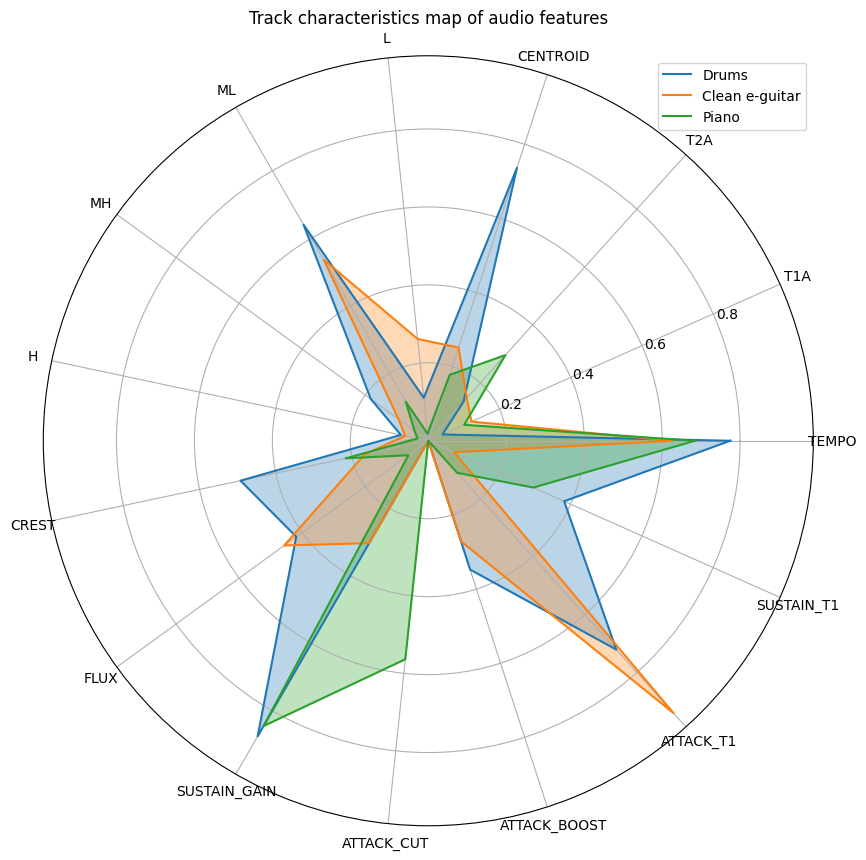

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from os.path import join

with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1in.json"), "r") as json_file:
    input_data = json.load(json_file)
with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1out.json"), "r") as json_file:
    output_data = json.load(json_file)

data = dict()
for key in input_data.keys():
    data[key] = input_data[key] + output_data[key]
df = pd.DataFrame.from_dict(data).T
# df.index = df.index.astype(int)
df = df.sort_index()
df.columns = ["TEMPO",
              "T1A", 
              "T2A", 
              "CENTROID", 
              "L", 
              "ML", 
              "MH", 
              "H", 
              "CREST",
              "FLUX",
              "SUSTAIN_GAIN",
              "ATTACK_CUT",
              "ATTACK_BOOST",
              "ATTACK_T1",
              "SUSTAIN_T1"]

targets = ["1 4397-spicy-drums",
        #    "2 x-808-x-percs-kb",
           "8 est-clean-guitar",
           "58 A Minor, BWV 989"]
labels = ["Drums", "Clean e-guitar", "Piano"]
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10,10))

# Plot each subset separately
for target, label in zip(targets, labels):
    subset_df = df[df.index.str.startswith(str(target))]
    print(target)
    categories = subset_df.columns.tolist()
    data = subset_df.values[0]  # Selecting the first row of the subset for plotting
    
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    ax.plot(angles, data, label=label)
    ax.fill(angles, data, alpha=0.3)  # Fill the inner part with semi-transparent color

# Set tick labels to DataFrame index
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df.columns.tolist())

plt.legend()
plt.title('Track characteristics map of audio features')
plt.show()
